In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy import signal

In [4]:
# Percorso della cartella dei DataFrame
path_dataframes = os.path.join("dataset", "dataframes")

# Data Exploration and Visualization

,TIME,P1,P2,P3,P4,P5,P6,P7,Case
0,0.000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
1,0.001,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
2,0.002,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
3,0.003,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
4,0.004,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1



 Informazioni generali sul dataset di training:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212577 entries, 0 to 212576
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   TIME    212577 non-null  float64
 1   P1      212577 non-null  float64
 2   P2      212577 non-null  float64
 3   P3      212577 non-null  float64
 4   P4      212577 non-null  float64
 5   P5      212577 non-null  float64
 6   P6      212577 non-null  float64
 7   P7      212577 non-null  float64
 8   Case    212577 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 14.6 MB

 Valori nulli nel dataset:


TIME    0
P1      0
P2      0
P3      0
P4      0
P5      0
P6      0
P7      0
Case    0
dtype: int64


 Statistiche descrittive del dataset di training:


,TIME,P1,P2,P3,P4,P5,P6,P7,Case
count,212577.0000,212577.000000,212577.000000,212577.000000,212577.000000,212577.000000,212577.000000,212577.000000,212577.000000
mean,0.6000,1.985313,1.978832,1.973185,1.976326,1.979386,1.967744,1.971499,89.000000
std,0.3467,0.295166,0.444962,0.531813,0.573256,0.457598,0.589124,0.584963,51.094804
min,0.0000,0.349958,0.000525,-0.036125,-0.022876,-0.003158,-0.043870,-0.025077,1.000000
25%,0.3000,1.894327,1.843861,1.830259,1.809942,1.840962,1.806549,1.799151,45.000000
50%,0.6000,1.958179,1.930710,1.930259,1.923895,1.927255,1.917058,1.917724,89.000000
75%,0.9000,2.061673,2.102222,2.113830,2.129266,2.107731,2.138921,2.141128,133.000000
max,1.2000,4.485485,5.634843,6.604209,6.079427,5.213492,5.868886,5.676262,177.000000



 Distribuzione delle prime colonne:


array([[<Axes: title={'center': 'TIME'}>, <Axes: title={'center': 'P1'}>],
       [<Axes: title={'center': 'P2'}>, <Axes: title={'center': 'P3'}>],
       [<Axes: title={'center': 'P4'}>, <Axes: >]], dtype=object)

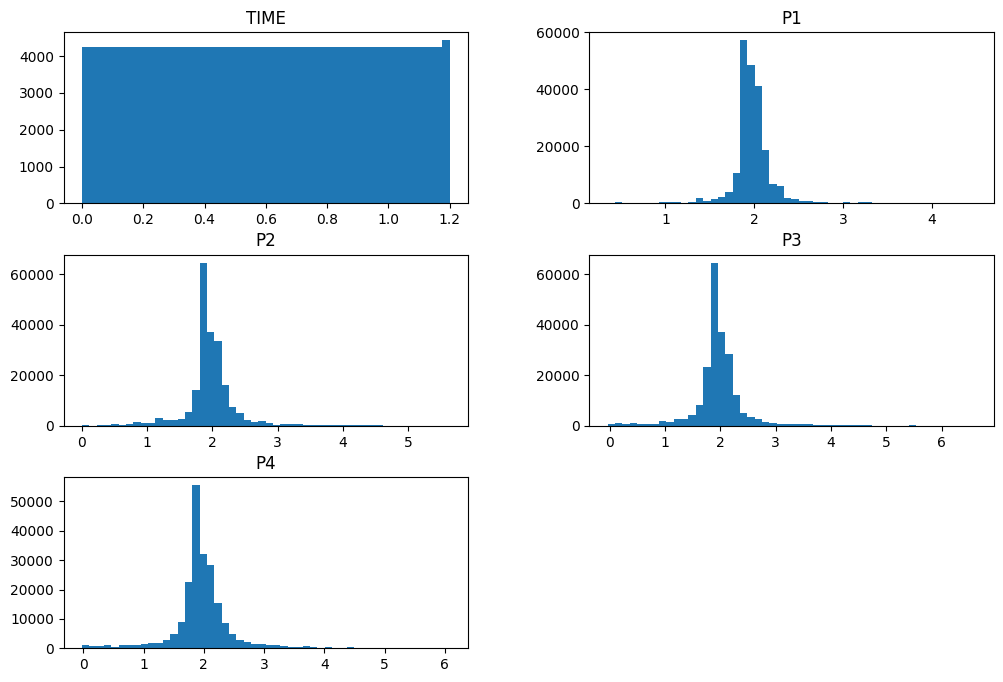

In [5]:
# Caricamento del dataset dal file Pickle
df_train = pd.read_pickle(os.path.join(path_dataframes, "train_data.pkl"))

# Mostriamo le prime righe per confermare il caricamento
display(df_train.head())

# Informazioni generali sul dataset
print("\n Informazioni generali sul dataset di training:")
df_train.info()

# Controllo della presenza di valori nulli
print("\n Valori nulli nel dataset:")
display(df_train.isnull().sum())

# Statistiche descrittive del dataset
print("\n Statistiche descrittive del dataset di training:")
display(df_train.describe())

# Distribuzione delle prime colonne numeriche
print("\n Distribuzione delle prime colonne:")
df_train.iloc[:, :5].hist(figsize=(12, 8), bins=50, grid=False)


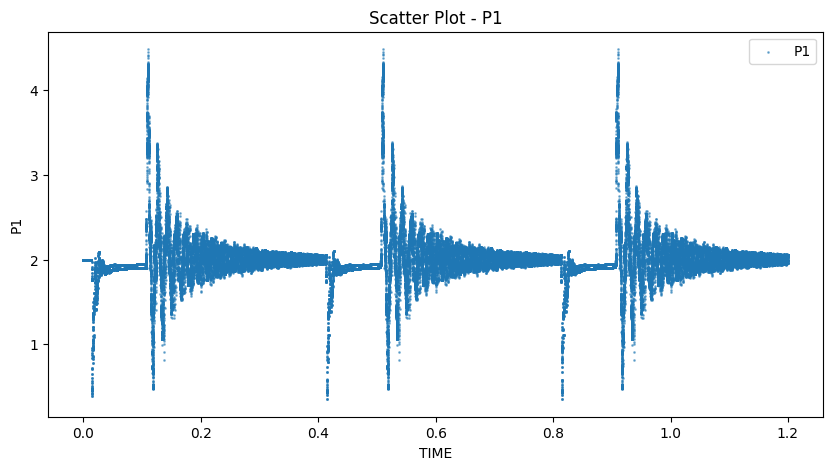

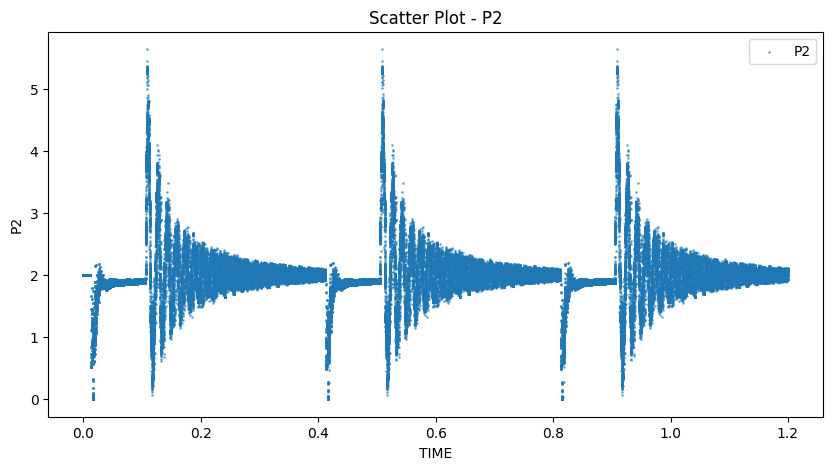

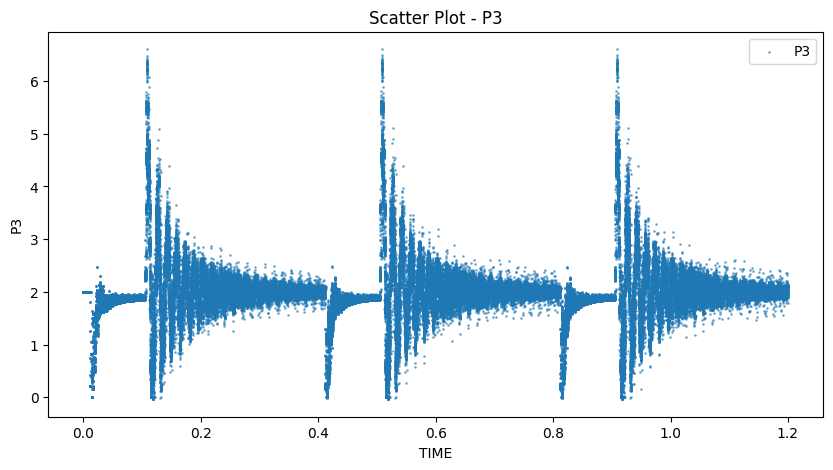

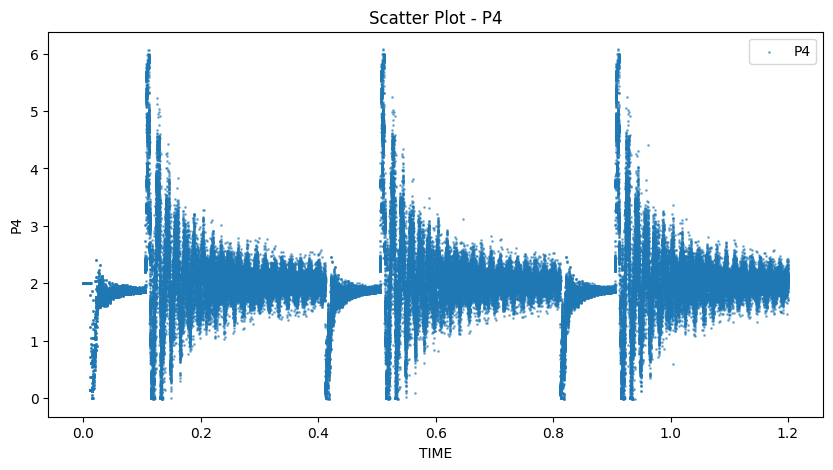

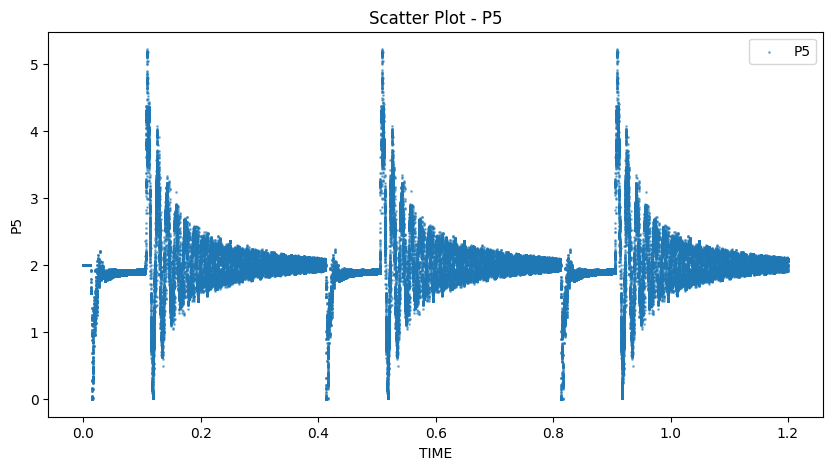

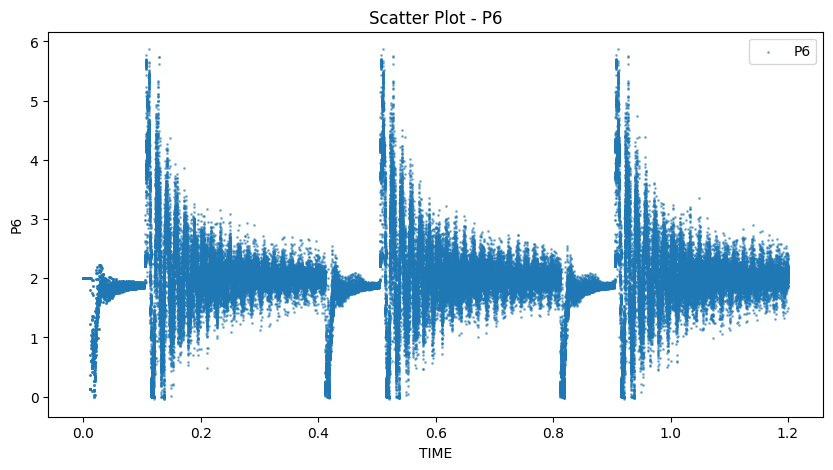

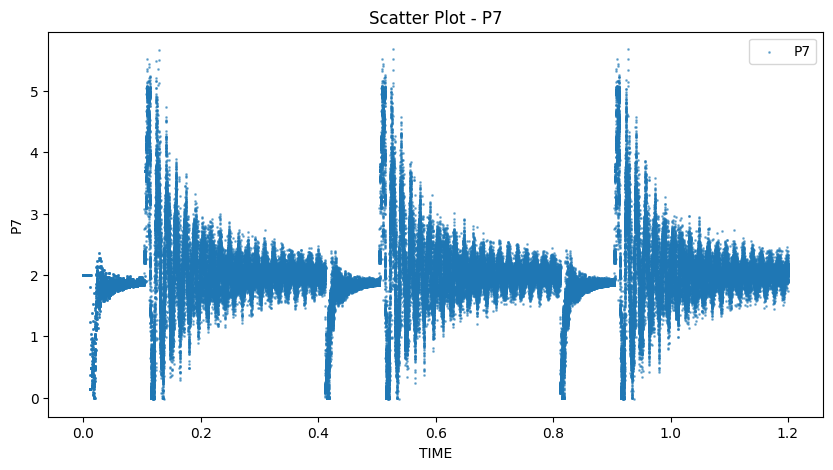

In [6]:
# Selezioniamo i sensori ignorando TIME e Case
sensori = [col for col in df_train.columns if col not in ["TIME", "Case"]]

# Creazione degli scatter plot per ogni sensore
for sensore in sensori:
    plt.figure(figsize=(10, 5))
    plt.scatter(df_train["TIME"], df_train[sensore], alpha=0.5, s=1, label=sensore)
    plt.xlabel("TIME")
    plt.ylabel(sensore)
    plt.title(f"Scatter Plot - {sensore}")
    plt.legend()
    plt.show()

# Visualizzazione per Sensore e Caso

In [7]:
# Selezione di un sensore specifico (scegliamo il primo sensore disponibile)
sensore_selezionato = df_train.columns[2]  # Ignoriamo TIME e Case

# Selezione di un solo caso tra i 178 disponibili
caso_selezionato = 1  # Cambia questo valore per selezionare un altro caso
df_caso = df_train[df_train["Case"] == caso_selezionato]

# Creazione del grafico a linee con Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_caso["TIME"],
    y=df_caso[sensore_selezionato],
    mode='lines',
    name=sensore_selezionato
))

fig.update_layout(
    title=f"Serie Temporale - Sensore {sensore_selezionato} - Caso {caso_selezionato}",
    xaxis_title="TIME",
    yaxis_title=sensore_selezionato,
    template="plotly_white"
)

# Mostra il grafico
fig.show()

Serie temporale per sensore scelto

In [8]:
# Caricamento del dataset etichettato
df_train_labeled = pd.read_csv(os.path.join(path_dataframes, "train_data_labeled.csv"))

# Selezione di un sensore specifico (scegliamo il primo sensore disponibile dopo TIME e Case)
sensore_selezionato = df_train_labeled.columns[2]  # Ignoriamo TIME e Case

# Creazione del grafico con Plotly
fig = go.Figure()

# Selezione di un solo caso rappresentativo per ogni condizione
condizioni = ["Normal", "Fault", "Anomaly"]
# Definizione di colori più neutri
colori = {"Normal": "#636EFA", "Fault": "#EF553B", "Anomaly": "#00CC96"}  # Blu, Rosso, Verde acqua

for condizione in condizioni:
    df_condizione = df_train_labeled[df_train_labeled["Condition"] == condizione]
    
    # Seleziona un solo caso rappresentativo
    if not df_condizione.empty:
        caso_singolo = df_condizione["Case"].unique()[0]  # Prende il primo caso disponibile
        df_singolo = df_condizione[df_condizione["Case"] == caso_singolo]
        
        fig.add_trace(go.Scatter(
            x=df_singolo["TIME"],
            y=df_singolo[sensore_selezionato],
            mode='lines',
            name=f"{condizione} - Case {caso_singolo}",
            line=dict(color=colori.get(condizione, "blue"))
        ))

# Layout del grafico
fig.update_layout(
    title=f"Serie Temporale per Singoli Casi - Sensore {sensore_selezionato}",
    xaxis_title="TIME (ms)",
    yaxis_title=f"Sensore {sensore_selezionato} (MPa)",
    template="plotly_white"
)

# Mostra il grafico
fig.show()

Fase di apertura per sensore scelto su singola finestra temporale

In [9]:
# Selezione di un sensore specifico (es. P5, come nella figura)
sensore_selezionato = "P2"  # Modifica per il sensore corretto

# Selezione della finestra temporale desiderata (scegli tra le seguenti opzioni)
time_window = (0.000, 0.100)  # Modifica in (0.400, 0.500) o (0.800, 0.900) per altre fasi

# Selezione di un solo caso per ogni condizione
condizioni = ["Normal", "Fault", "Anomaly"]
colori = {"Normal": "#636EFA", "Fault": "#EF553B", "Anomaly": "#00CC96"}  # Blu, Rosso, Verde acqua

fig = go.Figure()

# Dizionario per tenere traccia dei casi selezionati
casi_selezionati = {}

for condizione in condizioni:
    df_condizione = df_train_labeled[df_train_labeled["Condition"] == condizione]
    
    # Seleziona un solo caso rappresentativo per ogni condizione
    if not df_condizione.empty:
        caso_singolo = df_condizione["Case"].unique()[0]  # Prende il primo caso disponibile
        df_singolo = df_condizione[df_condizione["Case"] == caso_singolo]

        # Filtriamo solo la fase temporale specificata
        df_singolo_apertura = df_singolo[(df_singolo["TIME"] >= time_window[0]) & (df_singolo["TIME"] <= time_window[1])]

        # Salviamo il caso selezionato
        casi_selezionati[condizione] = caso_singolo

        fig.add_trace(go.Scatter(
            x=df_singolo_apertura["TIME"],
            y=df_singolo_apertura[sensore_selezionato],
            mode='lines',
            name=f"{condizione} (Case {caso_singolo})",
            line=dict(color=colori.get(condizione, "#7F7F7F"))  # Default a grigio se condizione sconosciuta
        ))

# Layout del grafico
fig.update_layout(
    title=f"Fase di Apertura ({time_window[0]}-{time_window[1]} ms) - Sensore {sensore_selezionato}",
    xaxis_title="TIME (ms)",
    yaxis_title=f"Sensore {sensore_selezionato} (MPa)",
    template="plotly_white"
)

# Mostra il grafico
fig.show()

Fasi di chiusura per sensore scelto per singola finestra temporale

In [10]:
# Selezione di un sensore specifico (es. P5, come nella figura)
sensore_selezionato = "P2"  # Modifica per il sensore corretto

# Selezione della finestra temporale desiderata (scegli tra le seguenti opzioni)
time_window = (0.100, 0.400)  # Modifica in (0.400, 0.500) o (0.800, 0.900) per altre fasi

# Selezione di un solo caso per ogni condizione
condizioni = ["Normal", "Fault", "Anomaly"]
colori = {"Normal": "#636EFA", "Fault": "#EF553B", "Anomaly": "#00CC96"}  # Blu, Rosso, Verde acqua

fig = go.Figure()

# Dizionario per tenere traccia dei casi selezionati
casi_selezionati = {}

for condizione in condizioni:
    df_condizione = df_train_labeled[df_train_labeled["Condition"] == condizione]
    
    # Seleziona un solo caso rappresentativo per ogni condizione
    if not df_condizione.empty:
        caso_singolo = df_condizione["Case"].unique()[0]  # Prende il primo caso disponibile
        df_singolo = df_condizione[df_condizione["Case"] == caso_singolo]

        # Filtriamo solo la fase temporale specificata
        df_singolo_apertura = df_singolo[(df_singolo["TIME"] >= time_window[0]) & (df_singolo["TIME"] <= time_window[1])]

        # Salviamo il caso selezionato
        casi_selezionati[condizione] = caso_singolo

        fig.add_trace(go.Scatter(
            x=df_singolo_apertura["TIME"],
            y=df_singolo_apertura[sensore_selezionato],
            mode='lines',
            name=f"{condizione} (Case {caso_singolo})",
            line=dict(color=colori.get(condizione, "#7F7F7F"))  # Default a grigio se condizione sconosciuta
        ))

# Layout del grafico
fig.update_layout(
    title=f"Fase di chiusura ({time_window[0]}-{time_window[1]} ms) - Sensore {sensore_selezionato}",
    xaxis_title="Tempo (ms)",
    yaxis_title=f"Sensore {sensore_selezionato} (MPa)",
    template="plotly_white"
)

# Mostra il grafico
fig.show()

Fase di apertura e chiusura per singola finestra temporale

In [11]:
# Selezione di un sensore specifico (es. P5, come nella figura)
sensore_selezionato = "P2"  # Modifica per il sensore corretto

# Selezione della finestra temporale desiderata (scegli tra le seguenti opzioni)
time_window = (0.000, 0.400)  # Modifica per altre fasi

# Selezione di un solo caso per ogni condizione
condizioni = ["Normal", "Fault", "Anomaly"]
colori = {"Normal": "#636EFA", "Fault": "#EF553B", "Anomaly": "#00CC96"}  # Blu, Rosso, Verde acqua

fig = go.Figure()

# Dizionario per tenere traccia dei casi selezionati
casi_selezionati = {}

for condizione in condizioni:
    df_condizione = df_train_labeled[df_train_labeled["Condition"] == condizione]
    
    # Seleziona un solo caso rappresentativo per ogni condizione
    if not df_condizione.empty:
        caso_singolo = df_condizione["Case"].unique()[0]  # Prende il primo caso disponibile
        df_singolo = df_condizione[df_condizione["Case"] == caso_singolo]

        # Filtriamo solo la fase temporale specificata
        df_singolo_apertura = df_singolo[(df_singolo["TIME"] >= time_window[0]) & (df_singolo["TIME"] <= time_window[1])]

        # Salviamo il caso selezionato
        casi_selezionati[condizione] = caso_singolo

        fig.add_trace(go.Scatter(
            x=df_singolo_apertura["TIME"],
            y=df_singolo_apertura[sensore_selezionato],
            mode='lines',
            name=f"{condizione} (Case {caso_singolo})",
            line=dict(color=colori.get(condizione, "#7F7F7F"))  # Default a grigio se condizione sconosciuta
        ))

# Layout del grafico
fig.update_layout(
    title=f"Fase di apertura e chiusura ({time_window[0]}-{time_window[1]} ms) - Sensore {sensore_selezionato}",
    xaxis_title="Tempo (ms)",
    yaxis_title=f"Sensore {sensore_selezionato} (MPa)",
    template="plotly_white"
)

# Mostra il grafico
fig.show()

# Metriche statistiche

Std per sensori scelti

In [12]:
# Selezione del sensore da analizzare
sensore_selezionato = ["P2"]

# Calcolo della deviazione standard per ogni caso e sensore
df_std = df_train_labeled.groupby("Case")[sensore_selezionato].std().reset_index()

# Creazione del grafico della deviazione standard per il sensore P5 con go.Figure()
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_std["Case"],
    y=df_std["P2"],
    mode='markers',
    marker=dict(color='red', size=3),
    name="Deviazione Standard P2"
))

# Layout del grafico
fig.update_layout(
    title="Deviazione Standard sensore P2",
    xaxis_title="Caso",
    yaxis_title="Deviazione Standard P2",
    template="plotly_white"
)

# Mostra il grafico
fig.show()

# Metriche in Frequenza

FFT per sensore scelto

In [13]:
# Selezione del sensore da analizzare
sensore_selezionato = "P2"

# Selezione di un solo caso per ogni condizione
condizioni = ["Normal", "Fault", "Anomaly"]
colori = {"Normal": "#636EFA", "Fault": "#EF553B", "Anomaly": "#00CC96"}  # Blu, Rosso, Verde acqua

# Impostazione del sampling rate a 1000 Hz (1 kHz)
sampling_rate = 1000  # Hz
signal_length_ms = 1200  # Lunghezza del segnale in ms

fig = go.Figure()

# Dizionario per tenere traccia dei casi selezionati
casi_selezionati = {}

for condizione in condizioni:
    df_condizione = df_train_labeled[df_train_labeled["Condition"] == condizione]
    
    # Seleziona un solo caso rappresentativo per ogni condizione
    if not df_condizione.empty:
        caso_singolo = df_condizione["Case"].unique()[0]  # Prende il primo caso disponibile
        df_singolo = df_condizione[df_condizione["Case"] == caso_singolo]

        # Salviamo il caso selezionato
        casi_selezionati[condizione] = caso_singolo

        # Applicazione della FFT (Trasformata di Fourier)
        N = len(df_singolo[sensore_selezionato])
        fft_vals = np.fft.fft(df_singolo[sensore_selezionato])
        fft_freqs = np.fft.fftfreq(N, d=1/sampling_rate)  # Imposta il sampling rate

        # Prendiamo solo la parte positiva delle frequenze
        mask_freq = fft_freqs > 0
        fft_freqs = fft_freqs[mask_freq]
        fft_vals = fft_vals[mask_freq]

        # Consideriamo solo metà dello spettro per evitare riflessioni
        fft_freqs = fft_freqs[:signal_length_ms//2]
        fft_vals = fft_vals[:signal_length_ms//2]

        fig.add_trace(go.Scatter(
            x=fft_freqs,
            y=fft_vals.real,  # Consideriamo la parte reale per rappresentazione
            mode='lines',
            name=f"{condizione} (Case {caso_singolo})",
            line=dict(color=colori.get(condizione, "#7F7F7F"))  # Default a grigio se condizione sconosciuta
        ))

# Layout del grafico
fig.update_layout(
    title=f"Trasformata di Fourier - Sensore {sensore_selezionato} (Sampling Rate {sampling_rate} Hz)",
    xaxis_title="Frequenza (Hz)",
    yaxis_title="Ampiezza FFT",
    template="plotly_white"
)

# Mostra il grafico
fig.show()

# Stampiamo i casi selezionati per riferimento
print("Casi selezionati:", casi_selezionati)

Casi selezionati: {'Normal': np.int64(1), 'Fault': np.int64(106), 'Anomaly': np.int64(154)}


# FFT modificata

In [ ]:
# Selezione del sensore da analizzare
sensore_selezionato = "P2"

# Selezione di un solo caso per ogni condizione
condizioni = ["Normal", "Fault", "Anomaly"]
colori = {"Normal": "#636EFA", "Fault": "#EF553B", "Anomaly": "#00CC96"}  # Blu, Rosso, Verde acqua

# Impostazione del sampling rate a 1000 Hz (1 kHz)
sampling_rate = 1000  # Hz
fig = go.Figure()

# Dizionario per tenere traccia dei casi selezionati
casi_selezionati = {}

for condizione in condizioni:
    df_condizione = df_train_labeled[df_train_labeled["Condition"] == condizione]
    
    # Seleziona un solo caso rappresentativo per ogni condizione
    if not df_condizione.empty:
        caso_singolo = df_condizione["Case"].unique()[0]  # Prende il primo caso disponibile
        df_singolo = df_condizione[df_condizione["Case"] == caso_singolo]

        # Salviamo il caso selezionato
        casi_selezionati[condizione] = caso_singolo

        # Applicazione della Finestra Hanning
        segnale = df_singolo[sensore_selezionato].values
        segnale_finestrato = segnale * np.hanning(len(segnale))

        # Applicazione della FFT
        N = len(segnale_finestrato)
        fft_vals = np.fft.fft(segnale_finestrato)
        fft_freqs = np.fft.fftfreq(N, d=1/sampling_rate)

        # Prendiamo solo la parte positiva dello spettro
        mask_freq = fft_freqs > 0
        fft_freqs = fft_freqs[mask_freq]
        fft_vals = np.abs(fft_vals[mask_freq])  # Modulo della FFT

        fig.add_trace(go.Scatter(
            x=fft_freqs,
            y=fft_vals,
            mode='lines',
            name=f"{condizione} (Case {caso_singolo})",
            line=dict(color=colori.get(condizione, "#7F7F7F"))  # Default a grigio se condizione sconosciuta
        ))

# Layout del grafico
fig.update_layout(
    title=f"Trasformata di Fourier - Sensore {sensore_selezionato}",
    xaxis_title="Frequenza (Hz)",
    yaxis_title="Ampiezza FFT",
    yaxis_type="log",  # Scala logaritmica per enfatizzare le differenze
    template="plotly_white"
)

# Mostra il grafico
fig.show()

# Stampiamo i casi selezionati per riferimento
print("Casi selezionati:", casi_selezionati)


Casi selezionati: {'Normal': np.int64(1), 'Fault': np.int64(106), 'Anomaly': np.int64(154)}


In [ ]:
# Selezione del sensore da analizzare
sensore_selezionato = "P2"

# Selezione di un solo caso per ogni condizione
condizioni = ["Normal", "Fault", "Anomaly"]
colori = {"Normal": "#636EFA", "Fault": "#EF553B", "Anomaly": "#00CC96"}

# Impostazione del sampling rate
sampling_rate = 1000  # Hz

fig = go.Figure()

for condizione in condizioni:
    df_condizione = df_train_labeled[df_train_labeled["Condition"] == condizione]
    if not df_condizione.empty:
        caso_singolo = df_condizione["Case"].unique()[0]
        df_singolo = df_condizione[df_condizione["Case"] == caso_singolo]

        # Calcolo della PSD utilizzando il metodo di Welch
        frequenze, psd = signal.welch(df_singolo[sensore_selezionato], fs=sampling_rate)

        fig.add_trace(go.Scatter(
            x=frequenze,
            y=psd,
            mode='lines',
            name=f"{condizione} (Case {caso_singolo})",
            line=dict(color=colori.get(condizione, "#7F7F7F"))
        ))

fig.update_layout(
    title=f"Densità Spettrale di Potenza (PSD) - Sensore {sensore_selezionato}",
    xaxis_title="Frequenza (Hz)",
    yaxis_title="PSD (dB/Hz)",
    yaxis_type="log", # Scala logaritmica per enfatizzare le differenze
    template="plotly_white"
)

fig.show()

In [ ]:
# Selezione del sensore da analizzare
sensore_selezionato = "P2"

# Selezione di un solo caso per ogni condizione
condizioni = ["Normal", "Fault", "Anomaly"]
colori = {"Normal": "#636EFA", "Fault": "#EF553B", "Anomaly": "#00CC96"}

# Impostazione del sampling rate
sampling_rate = 1000  # Hz

# Parametri dello spettrogramma
nperseg = 256  # Lunghezza della finestra
noverlap = 128 # Sovrapposizione tra le finestre
window = 'hann' # Tipo di finestra

for condizione in condizioni:
    df_condizione = df_train_labeled[df_train_labeled["Condition"] == condizione]
    if not df_condizione.empty:
        caso_singolo = df_condizione["Case"].unique()[0]
        # Filtra df_condizione direttamente
        df_singolo = df_condizione[df_condizione["Case"] == caso_singolo]

        # Calcolo dello spettrogramma con parametri ottimizzati
        frequenze, tempi, spettrogramma = signal.spectrogram(
            df_singolo[sensore_selezionato],
            fs=sampling_rate,
            nperseg=nperseg,
            noverlap=noverlap,
            window=window
        )

        # Creazione della figura con Plotly
        fig = go.Figure(data=go.Heatmap(
            x=tempi,
            y=frequenze,
            z=10 * np.log10(spettrogramma),  # Conversione in dB
            colorscale='Plasma',  # Colormap migliorata
            zsmooth='best'  # Interpolazione per una visualizzazione più fluida
        ))

        fig.update_layout(
            title=f"Spettrogramma - Sensore {sensore_selezionato} - {condizione} (Case {caso_singolo})",
            xaxis_title="Tempo (s)",
            yaxis_title="Frequenza (Hz)",
            template="plotly_white",
            yaxis=dict(range=[0, 500]), # Limita la frequenza a 500 Hz
            coloraxis=dict(colorbar=dict(title="Intensità (dB)")) # Aggiunge il titolo alla colorbar
        )

        fig.show()

In [ ]:
def calcola_spettro(segnale, sampling_rate):
    """
    Calcola lo spettro del segnale utilizzando la Trasformata di Fourier (FFT).

    Args:
        segnale (numpy.ndarray): Il segnale da analizzare.
        sampling_rate (int): La frequenza di campionamento del segnale in Hz.

    Returns:
        tuple: Una tupla contenente le frequenze e l'ampiezza dello spettro.
    """

    N = len(segnale)
    fft_vals = np.fft.fft(segnale)
    fft_freqs = np.fft.fftfreq(N, d=1/sampling_rate)

    # Prendiamo solo la parte positiva dello spettro
    mask_freq = fft_freqs > 0
    fft_freqs = fft_freqs[mask_freq]
    fft_vals = np.abs(fft_vals[mask_freq])  # Modulo della FFT

    return fft_freqs, fft_vals

# Selezione del sensore da analizzare
sensore_selezionato = "P2"

# Selezione di un solo caso per ogni condizione
condizioni = ["Normal", "Fault", "Anomaly"]
colori = {"Normal": "blue", "Fault": "red", "Anomaly": "green"}  # Colori più semplici

# Impostazione del sampling rate
sampling_rate = 1000  # Hz

for condizione in condizioni:
    df_condizione = df_train_labeled[df_train_labeled["Condition"] == condizione]
    if not df_condizione.empty:
        caso_singolo = df_condizione["Case"].unique()[0]
        df_singolo = df_condizione[df_condizione["Case"] == caso_singolo]

        # Calcola lo spettro
        frequenze, ampiezze = calcola_spettro(df_singolo[sensore_selezionato].values, sampling_rate)

        # Creazione del grafico con Plotly
        fig = go.Figure(data=go.Scatter(x=frequenze, y=ampiezze, mode='lines', line=dict(color=colori[condizione])))

        fig.update_layout(
            title=f"Spettro del Segnale - Sensore {sensore_selezionato} - {condizione} (Case {caso_singolo})",
            xaxis_title="Frequenza (Hz)",
            yaxis_title="Ampiezza",
            template="plotly_white"
        )

        fig.show()